In [1]:
import os
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
import seaborn as sns

# Non-linear models

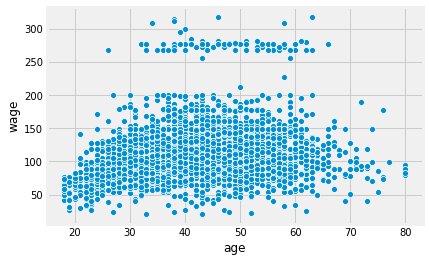

In [5]:
#print(os.listdir())
wage = pd.read_csv("Wage.csv")
fig, ax = plt.subplots()
sns.scatterplot(wage["age"],wage["wage"], data=wage, ax=ax)

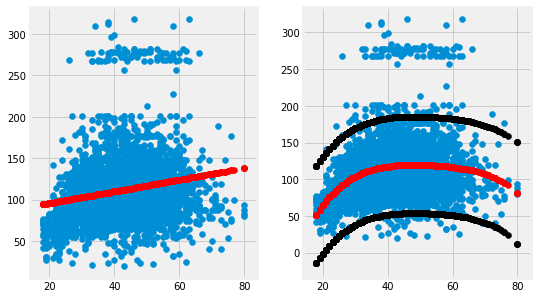

In [51]:
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

X = wage["age"].values
X = X.reshape(-1,1)
Y = wage["wage"]

poly = PolynomialFeatures(degree=4)
poly = poly.fit_transform(X)

X = sm.add_constant(X)

clf_1 = sm.OLS(Y,X).fit()
yhat_1 = clf_1.predict(X)

clf_2 = sm.OLS(Y,poly).fit()
yhat_2 = clf_2.predict(poly)


from statsmodels.stats.outliers_influence import summary_table
st, data, ss2 = summary_table(clf_2, alpha=0.10)

predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
predict_ci_low, predict_ci_upp = data[:, 6:8].T

X = X[:,1]

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,5))
ax1.scatter(X,Y)
ax1.scatter(X,yhat_1, color="red")

ax2.scatter(X,Y)
ax2.scatter(X,yhat_2, color="red")
ax2.scatter(X, predict_ci_low, color="black")
ax2.scatter(X, predict_ci_upp, color="black")


In [96]:
Y_logit = np.array([1 if val > 250 else 0 for val in Y]).reshape(-1,1)

model = sm.Logit(Y_logit,poly).fit()
coefficients = model.params.reshape(-1,1)

# calculate the probabilies to earn more than 250k given age
exp_term = np.exp(np.dot(poly,coefficients))
prob = exp_term/(1+exp_term)

Optimization terminated successfully.
         Current function value: 0.116870
         Iterations 12


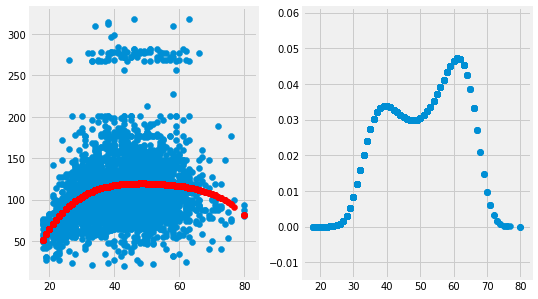

In [95]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,5))
ax1.scatter(X[:,1],Y)
ax1.scatter(X[:,1],yhat_2, color="red")

ax2.scatter(X[:,1],prob)